<a href="https://colab.research.google.com/github/karthik40121/OIB-SIP/blob/main/Project_2_Proposal_LEVEL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ifood_df.csv']))
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
df.isnull().sum()


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
df = df.fillna(df.median(numeric_only=True))


In [ ]:
df = df.drop_duplicates()


In [ ]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", mode(df.select_dtypes(include=np.number), keepdims=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Mean:
 Income                  51687.258783
Kidhome                     0.443345
Teenhome                    0.509649
Recency                    48.880752
MntWines                  306.492331
MntFruits                  26.364671
MntMeatProducts           166.059871
MntFishProducts            37.603662
MntSweetProducts           27.268679
MntGoldProds               43.921821
NumDealsPurchases           2.330035
NumWebPurchases             4.115289
NumCatalogPurchases         2.644730
NumStorePurchases           5.807521
NumWebVisitsMonth           5.340426
AcceptedCmp3                0.074715
AcceptedCmp4                0.076695
AcceptedCmp5                0.072241
AcceptedCmp1                0.065809
AcceptedCmp2                0.012865
Complain                    0.009401
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.153884
Age                        51.117269
Customer_Days            2511.613063
marital_Divorced            0.1

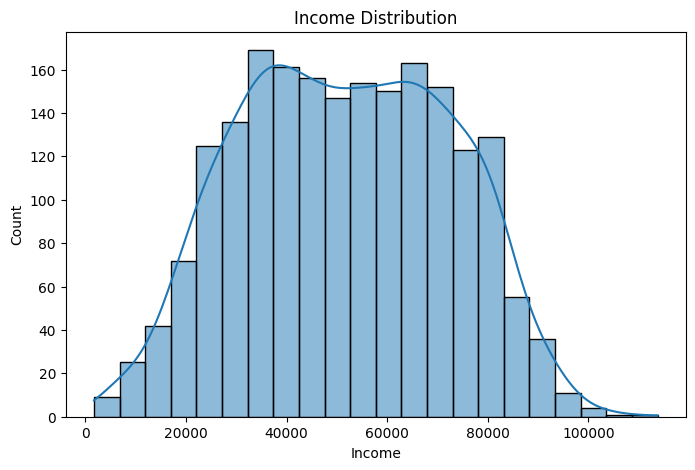

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution")
plt.show()


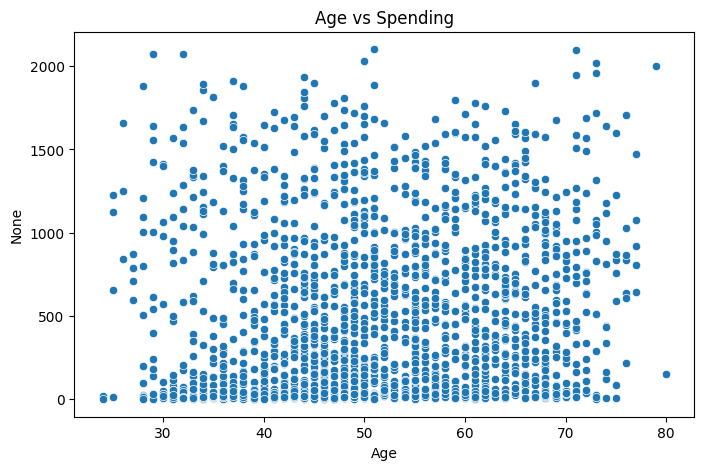

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['MntWines'] + df['MntMeatProducts'])
plt.title("Age vs Spending")
plt.show()


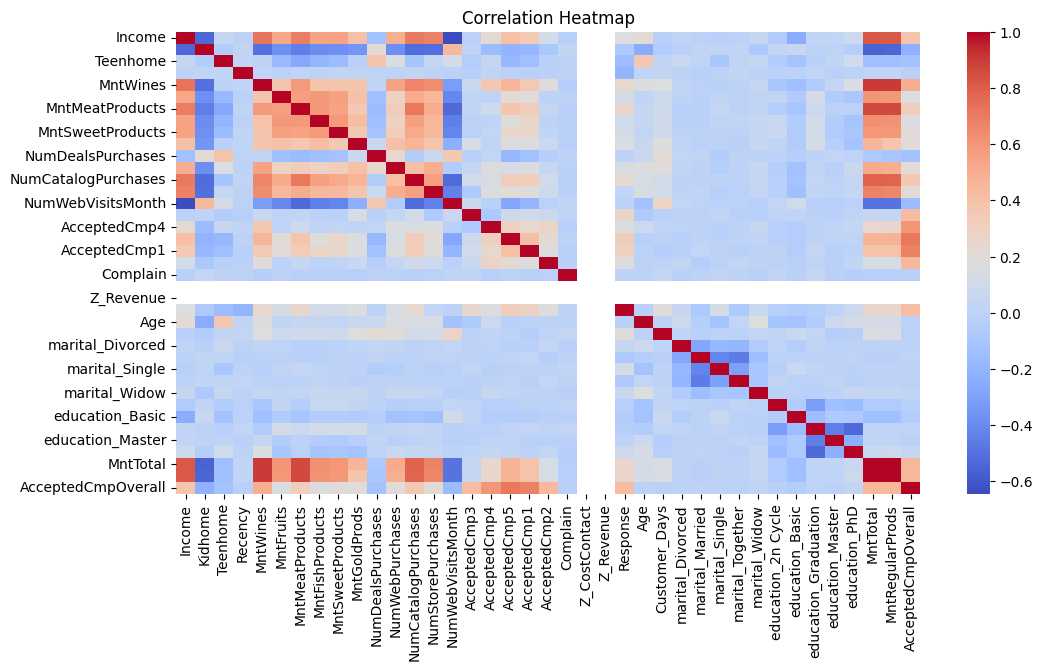

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
cluster_features = df[['Income','MntWines','MntMeatProducts','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds']]


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_features)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)



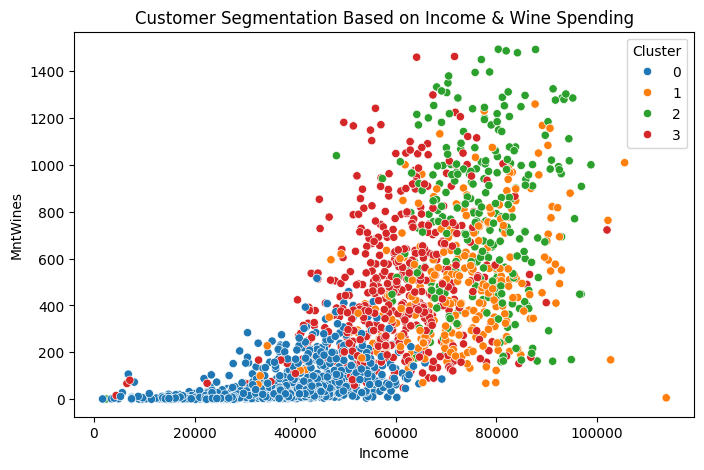

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Income'], y=df['MntWines'], hue=df['Cluster'], palette="tab10")
plt.title("Customer Segmentation Based on Income & Wine Spending")
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Cluster,,,,,,,,,,,,,,,,,,,,,
0,35508.260138,0.750742,0.511375,48.625124,58.939664,5.022750,27.099901,7.059347,5.049456,14.908012,...,0.255193,0.023739,0.099901,0.046489,0.485658,0.167161,0.200791,103.171118,88.263106,0.097923
1,73040.281139,0.078292,0.320285,48.886121,484.775801,96.021352,396.693950,130.035587,98.911032,96.380783,...,0.245552,0.049822,0.131673,0.003559,0.661922,0.096085,0.106762,1206.437722,1110.056940,0.459075
2,77044.187739,0.057471,0.226054,50.091954,771.827586,45.084291,509.785441,70.528736,47.501916,54.444444,...,0.233716,0.034483,0.053640,0.000000,0.467433,0.187739,0.291188,1444.727969,1390.283525,0.812261
3,59675.741453,0.213675,0.777778,48.754274,474.709402,20.205128,136.076923,29.726496,20.967949,69.232906,...,0.258547,0.049145,0.066239,0.002137,0.461538,0.192308,0.277778,681.685897,612.452991,0.365385
